In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")
df

,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
0,Afghanistan,AFG,1999,NaN,NaN,NaN,33.18571,NaN,27.298849,NaN,NaN
1,Afghanistan,AFG,2000,NaN,NaN,NaN,NaN,NaN,22.162991,NaN,NaN
2,Afghanistan,AFG,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.47151,NaN
3,Afghanistan,AFG,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN
4,Afghanistan,AFG,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.07805,1.381070
...,...,...,...,...,...,...,...,...,...,...,...
5887,Zimbabwe,ZWE,2018,2.05049,NaN,90.726250,NaN,NaN,97.879271,NaN,8.425119
5888,Zimbabwe,ZWE,2019,NaN,93.227547,90.232155,NaN,NaN,97.476614,NaN,9.995644
5889,Zimbabwe,ZWE,2020,NaN,NaN,91.866905,NaN,NaN,97.384162,NaN,9.723605
5890,Zimbabwe,ZWE,2021,NaN,NaN,86.099625,NaN,NaN,96.015148,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     5892 non-null   object 
 1   country_code                5892 non-null   object 
 2   year                        5892 non-null   int64  
 3   gov_exp_pct_gdp             4499 non-null   float64
 4   lit_rate_adult_pct          1877 non-null   float64
 5   pri_comp_rate_pct           4440 non-null   float64
 6   pupil_teacher_primary       3676 non-null   float64
 7   pupil_teacher_secondary     3017 non-null   float64
 8   school_enrol_primary_pct    5352 non-null   float64
 9   school_enrol_secondary_pct  4745 non-null   float64
 10  school_enrol_tertiary_pct   4392 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 506.5+ KB


### bỏ cột country_code vì không có ích trong việc phân tích

In [4]:
df = df.drop("country_code", axis=1)

### Đếm những giá trị nan_value hoặc null_value trong từng cột

In [5]:
df.isna().sum()

country                          0
year                             0
gov_exp_pct_gdp               1393
lit_rate_adult_pct            4015
pri_comp_rate_pct             1452
pupil_teacher_primary         2216
pupil_teacher_secondary       2875
school_enrol_primary_pct       540
school_enrol_secondary_pct    1147
school_enrol_tertiary_pct     1500
dtype: int64

### Đếm những giá trị 0

In [6]:
df.isin([0]).sum()

country                       0
year                          0
gov_exp_pct_gdp               0
lit_rate_adult_pct            0
pri_comp_rate_pct             0
pupil_teacher_primary         0
pupil_teacher_secondary       0
school_enrol_primary_pct      0
school_enrol_secondary_pct    0
school_enrol_tertiary_pct     0
dtype: int64

### số lượng giá trị nan_value và null_value theo từng hàng

In [7]:
df.isna().sum(axis=1)

0       6
1       7
2       6
3       7
4       5
       ..
5887    4
5888    4
5889    5
5890    6
5891    5
Length: 5892, dtype: int64

### Số lượng dữ liệu bị trùng lắp

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
num_unique = df['country'].nunique()
unique_values = df['country'].unique()
print(f"Số lượng quốc gia khác nhau: {num_unique}")
print(f"Các quốc gia khác nhau: {list(unique_values)}")

Số lượng quốc gia khác nhau: 256
Các quốc gia khác nhau: ['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Early-demographic dividend', 'East Asia & Pacific', 'East A

### những hàng giá trị nào mà có giá trị nan_value và null_value >= 4 thì sẽ xóa dòng dữ liệu đó
#### các hàng còn lại sẽ điền giá trị thiếu sẽ thay thế bằng gía trị trung bình của nước đó

In [10]:
df = df.dropna(thresh=len(df.columns) - 4 + 1)
df.isna().sum(axis=1)

8       3
10      3
12      2
16      2
17      2
       ..
5876    3
5877    3
5878    3
5881    1
5882    1
Length: 4210, dtype: int64

### Điền giá trị trung bình vào ô nan_value hoặc null_value bằng giá trị trung bình cột đó (nước hiện tại)

In [ ]:
columns_to_fill = [
    "gov_exp_pct_gdp",
    "lit_rate_adult_pct",
    "pri_comp_rate_pct",
    "pupil_teacher_primary",
    "pupil_teacher_secondary",
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct"
]

for column in columns_to_fill:
    # điền giá trị thiếu trong mỗi nhóm bằng giá trị của nhóm đó theo nước hiện tại ví dụ nước hiện tại cột 'gov_exp_pct_gdp' có 2 giá trị NAN hết thì lấy giá trị trung bình của fill cột( nếu có )
    # transform áp dụng 1 hàm lamda lên các giá trị NAN của cột x
    df[column] = df.groupby("country")[column].transform(lambda x: x.fillna(x.mean()))
    # nếu không có giá trị nào trong nhóm thì điền bằng giá trị trung bình của tất cả các nhóm
    df[column].fillna(df[column].mean(), inplace=True)


df.isnull().sum()

Group: Afghanistan
        country  year  gov_exp_pct_gdp  lit_rate_adult_pct  pri_comp_rate_pct  \
8   Afghanistan  2007         4.174895                 NaN                NaN   
10  Afghanistan  2009         4.810640                 NaN                NaN   
12  Afghanistan  2011         3.462010           31.000000                NaN   
16  Afghanistan  2015         3.255800           33.753841                NaN   
17  Afghanistan  2016         4.543970                 NaN          82.910461   
18  Afghanistan  2017         4.343190                 NaN          87.253326   
19  Afghanistan  2018              NaN                 NaN          88.735519   

    pupil_teacher_primary  pupil_teacher_secondary  school_enrol_primary_pct  \
8                42.77030                 31.56236                101.086456   
10               42.83639                      NaN                 99.369720   
12               43.51915                      NaN                100.290298   
16          

In [ ]:
df = df[~df['country'].isin(['IBRD only', 
                             'IDA & IBRD total',
                             'IDA blend',
                             'IDA only',
                             'IDA total',
                             'Lower middle income',
                             'Low income', 
                             'Low & middle income',
                             'Late-demographic dividend',
                             'Post-demographic dividend', 
                             'High income',
                             'Upper middle income',
                             'Fragile and conflict affected situations',
                             'World',
                             'Pre-demographic dividend',
                             ])]

## Xuất ra file clean_data.csv


In [ ]:
df.to_csv("clean_data.csv", index=False)

### Tìm hiểu xu hướng thay đổi tỉ lệ người biết chữ qua hàng năm 
#### - Biểu đô cho thấy tỉ lệ biết chữ của người trưởng thành (% dân số) có xu hướng tắng trưởng theo thời gian 
#### - Những năm gần đây tốc độ tăng trưởng ngày cang tăng cao
#### - Có một số giai đoạn giảm sút nhẹ nhyuwng tổng thể vẫn duy trì xu hướng tăng 
#### _ Những thay đổi này có thể phản ánh về các phương pháp thay dổi chính sách trong giáo dục hoặc yếu tố xã hội, kinh tế...


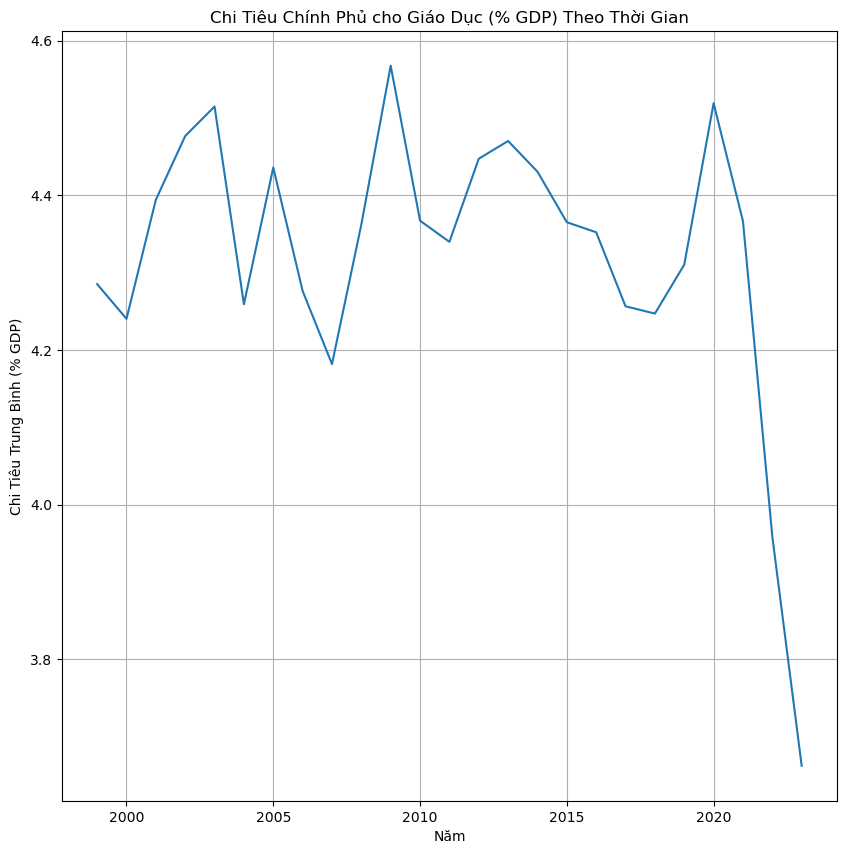

In [ ]:
plt.figure(figsize=(10, 10))
avg_gov_exp = df.groupby('year')['gov_exp_pct_gdp'].mean()
sns.lineplot(data=avg_gov_exp)
plt.title('Chi Tiêu Chính Phủ cho Giáo Dục (% GDP) Theo Thời Gian')
plt.xlabel('Năm')
plt.ylabel('Chi Tiêu Trung Bình (% GDP)')
plt.grid(True) 
plt.show()


##### - Từ những năm 2000 - 2015, chi tiêu giáo dục (%GDP) có xu hướng dao dộng nhưng vẫn tương đối ổn định
##### - Sau năm 2020 , mưc chi tiêu rơi xuống mức thấp nhất trong giai đoạn quan sát
##### - Sự giảm mạnh có thể do kết quả của các yếu tố bên ngoài, chẳng hạn như tác động kinh tế từ đại dịch COVID-19 hoặc thay dổi chính sách của chính phủ. Mức chi tiêu thấp có thể ảnh hưởng tiêu cực đến hệ thống giáo dục và chất lượng giáo dục nếu không có biện pháp khăc phục
##### - Một góc nhìn khác, có thể do tác động của công nghệ trong giáo dục: 
##### + Giảm chi phí vận hành truyền thông 
##### + Học tập từ xa, giảm chi phí cho các các lớp học vậht lý
##### + Mô hình tự động hóa giáo dục

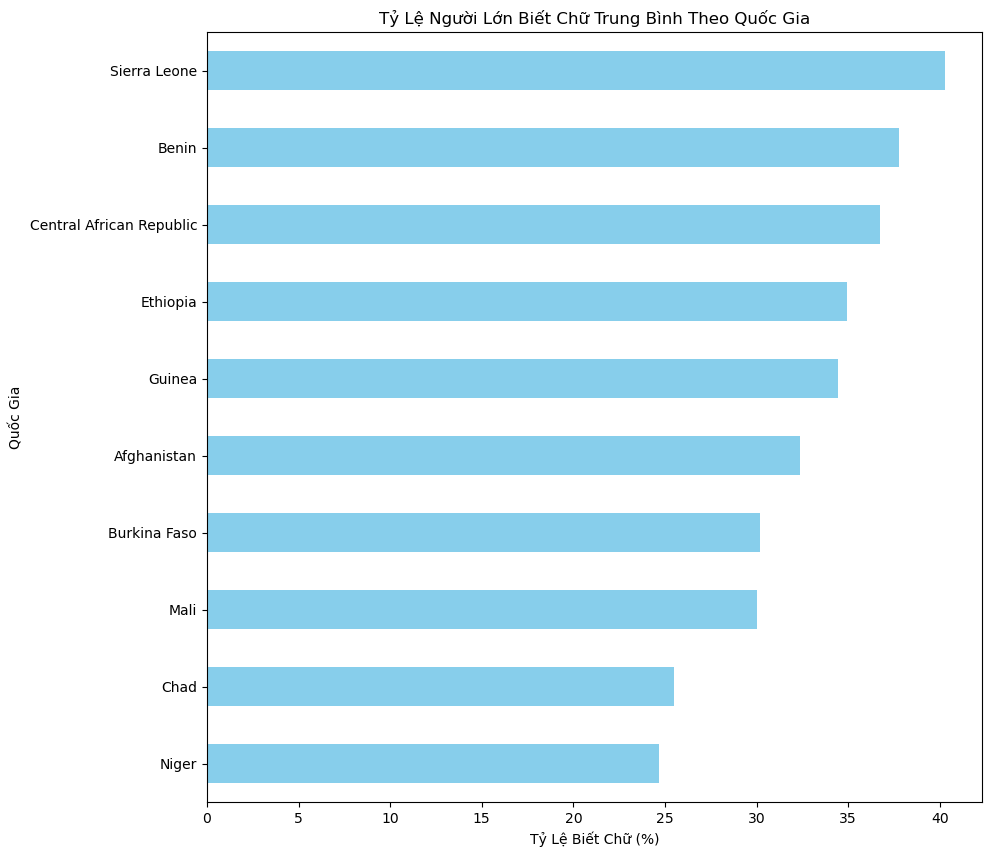

In [ ]:

lit_rate_by_country = df.groupby('country')['lit_rate_adult_pct'].mean().sort_values().head(10)
lit_rate_by_country.plot(kind='barh', figsize=(10, 10), color='skyblue')
plt.title('Tỷ Lệ Người Lớn Biết Chữ Trung Bình Theo Quốc Gia')
plt.xlabel('Tỷ Lệ Biết Chữ (%)')
plt.ylabel('Quốc Gia')
plt.show()

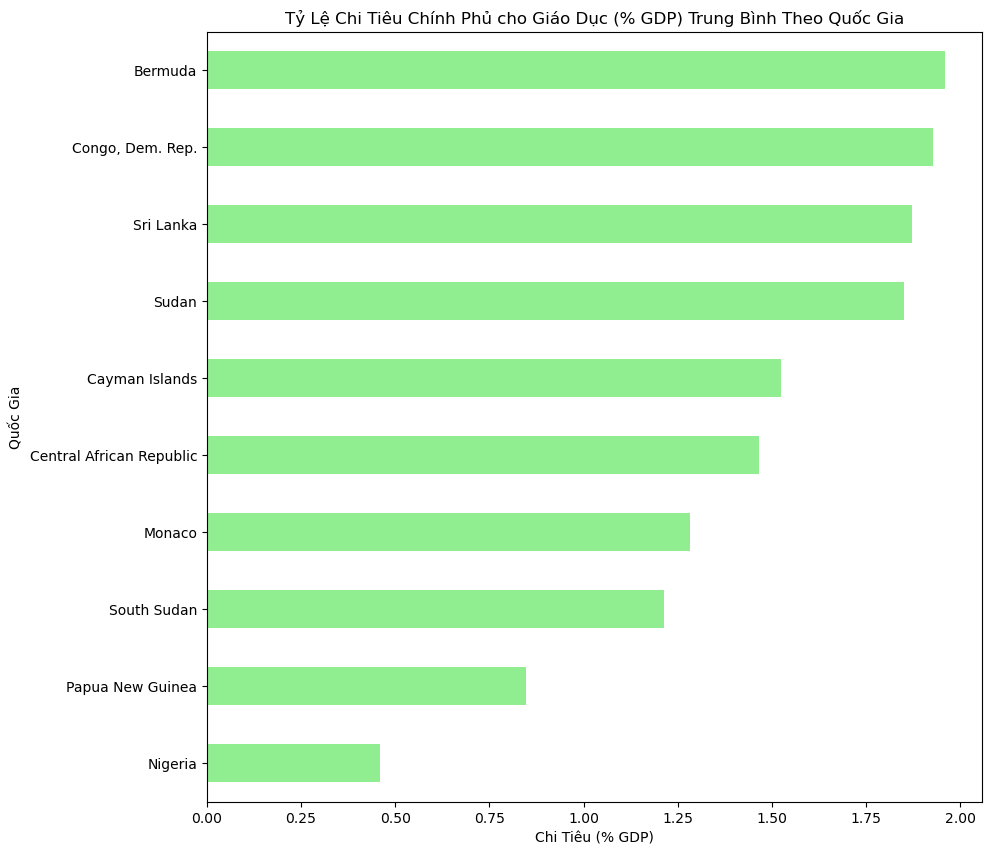

In [ ]:
gov_exp_by_country = df.groupby('country')['gov_exp_pct_gdp'].mean().sort_values().head(10)
gov_exp_by_country.plot(kind='barh', figsize=(10, 10), color='lightgreen')
plt.title('Tỷ Lệ Chi Tiêu Chính Phủ cho Giáo Dục (% GDP) Trung Bình Theo Quốc Gia')
plt.xlabel('Chi Tiêu (% GDP)')
plt.ylabel('Quốc Gia')
plt.show()


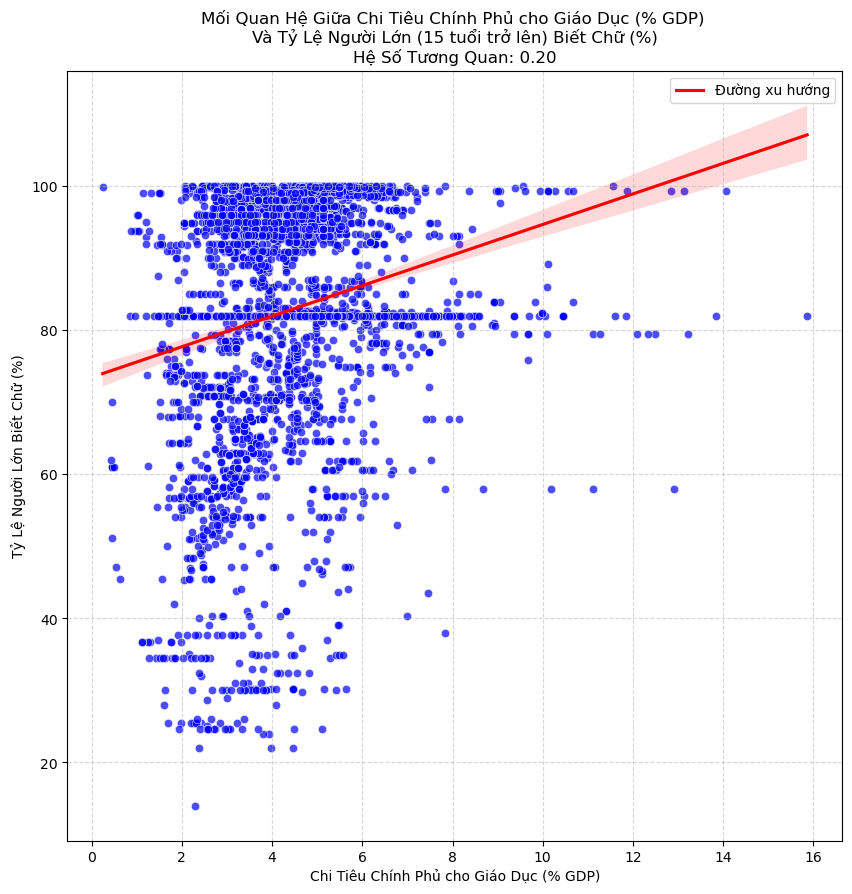

In [ ]:
correlation = df['gov_exp_pct_gdp'].corr(df['lit_rate_adult_pct'])

plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='gov_exp_pct_gdp', y='lit_rate_adult_pct', color='blue', alpha=0.7)
sns.regplot(data=df, x='gov_exp_pct_gdp', y='lit_rate_adult_pct', scatter=False, color='red', label='Đường xu hướng')
plt.title(f'Mối Quan Hệ Giữa Chi Tiêu Chính Phủ cho Giáo Dục (% GDP) \nVà Tỷ Lệ Người Lớn (15 tuổi trở lên) Biết Chữ (%)\nHệ Số Tương Quan: {correlation:.2f}')
plt.xlabel('Chi Tiêu Chính Phủ cho Giáo Dục (% GDP)')
plt.ylabel('Tỷ Lệ Người Lớn Biết Chữ (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### Hệ số tương quan là 0.23 , cho thấy mối quan hệ yếu và dương giữa chi tiêu giáo dục và (%GDB) và tỷ lệ biết chữ
##### - Điều naỳ có nghĩa khi chính phủ tăng chi tiêu cho giáo dục (tính theo GDP), tỷ lệ người biết chữ tăng nhưng không mạnh mẽ 
##### - Phần lớn các quốc gia có chi tiêu giáo dục năm khoảng 2-8%
##### - Tỷ lệ biết chữ   tập trung từ 70% - 100%, với nhiêfu quốc gia đạt 100%
##### - Đường xu hướng cho thấy xu hướng dương, nhưng tốc độ khá thấp. Nhấn mạnh chi tiêu giáo dục và tỷ lệ biết chữ không có quan hệ mật thiết với nhau


In [ ]:
df

,country,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
8,Afghanistan,2007,4.174895,32.376921,86.299769,42.77030,31.562360,101.086456,29.089170,5.914737
10,Afghanistan,2009,4.810640,32.376921,86.299769,42.83639,32.497248,99.369720,44.397171,4.024810
12,Afghanistan,2011,3.462010,31.000000,86.299769,43.51915,32.497248,100.290298,52.198429,3.755610
16,Afghanistan,2015,3.255800,33.753841,86.299769,43.38836,31.973800,106.182419,53.285141,5.914737
17,Afghanistan,2016,4.543970,32.376921,82.910461,44.58162,32.208140,106.150284,53.506340,5.914737
...,...,...,...,...,...,...,...,...,...,...
5876,Zimbabwe,2001,6.033095,81.991828,98.177948,38.10062,24.457050,116.359543,43.313549,7.024067
5877,Zimbabwe,2002,6.033095,81.991828,94.962868,39.41662,25.924090,111.178101,42.398319,7.024067
5878,Zimbabwe,2003,6.033095,81.991828,94.850792,38.55591,22.324490,109.501442,40.048538,7.024067
5881,Zimbabwe,2012,6.070210,81.991828,88.434380,35.86109,22.431910,103.768785,52.513191,6.417584


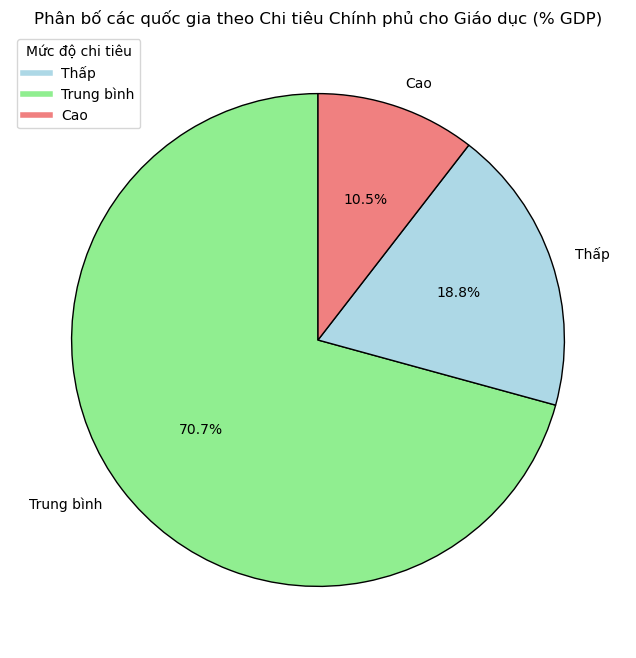

In [ ]:

# Nhóm dữ liệu theo quốc gia và tính trung bình của tỷ lệ chi tiêu cho giáo dục
gov_exp_by_country = df.groupby('country')['gov_exp_pct_gdp'].mean()

# Phân loại các quốc gia thành các nhóm dựa trên tỷ lệ chi tiêu (Low, Medium, High)
bins = [0, 3, 6, float('inf')]  # Ngưỡng cho các nhóm
labels = ['Thấp', 'Trung bình', 'Cao']  # Tên các nhóm
gov_exp_group = pd.cut(gov_exp_by_country, bins=bins, labels=labels)

# Đếm số lượng quốc gia trong mỗi nhóm
gov_exp_group_counts = gov_exp_group.value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))

# Chỉnh sửa màu sắc cho biểu đồ tròn
colors = ['lightgreen', 'lightblue', 'lightcoral']

# Vẽ biểu đồ tròn với các tham số cụ thể
ax = gov_exp_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

# Thêm tiêu đề
plt.title('Phân bố các quốc gia theo Chi tiêu Chính phủ cho Giáo dục (% GDP)')

# Tạo handles cho các màu sắc tương ứng với từng label
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in ['lightblue', 'lightgreen', 'lightcoral']]

# Thêm ô chú thích với màu sắc cho các nhãn
plt.legend(handles=handles, labels=labels, loc='upper left', title='Mức độ chi tiêu')

# Loại bỏ nhãn trục y
plt.ylabel('')
plt.show()

##### Nhóm quốc gia chi tiêu cho giáo dục ở mức trung bình (3-6% GDP) chiếm phần lớn, cho thấy nhiều quốc gia vẫn duy trì một mức độ đầu tư hợp lý vào giáo dục. Trong khi đó, nhóm chi tiêu thấp (0-3% GDP) chiếm khoảng 18%, phản ánh rằng vẫn còn nhiều quốc gia chưa chú trọng đầy đủ vào giáo dục, có thể do ngân sách hạn chế hoặc ưu tiên cho các lĩnh vực khác. Nhóm chi tiêu cao (trên 6% GDP) chiếm tỷ lệ khá ít, chứng tỏ chỉ một số ít quốc gia sẵn sàng đầu tư mạnh mẽ vào giáo dục, điều này có thể chỉ ra rằng họ đang tập trung phát triển giáo dục toàn diện hoặc xây dựng hệ thống giáo dục hiện đại.

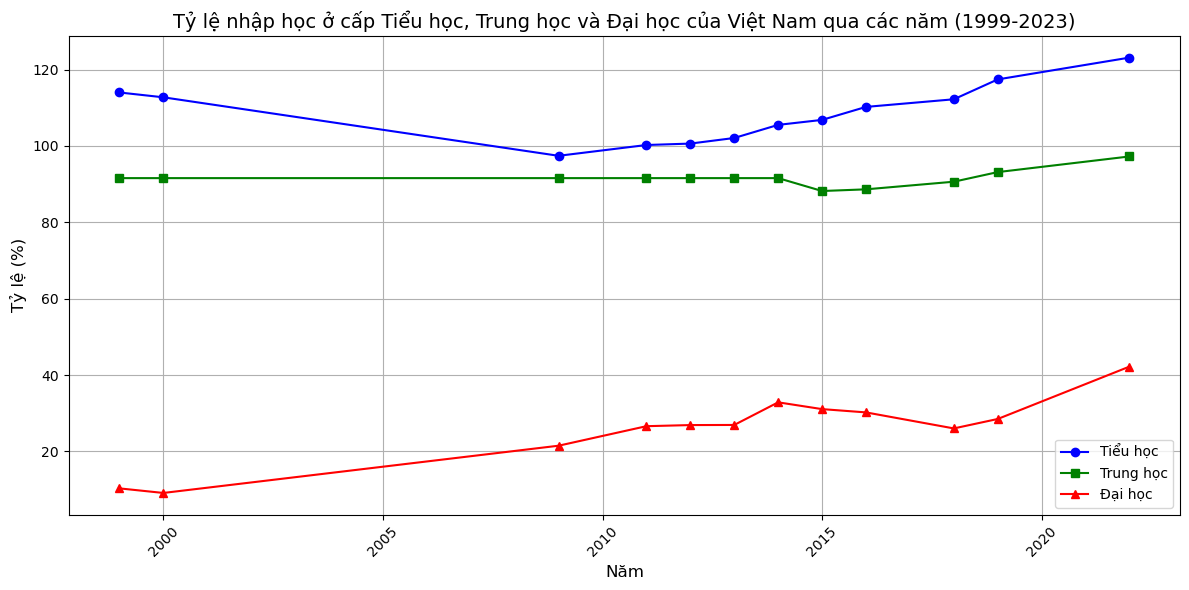

In [ ]:
country_data = df[df['country'] == 'Viet Nam']

# Vẽ biểu đồ đường cho tỷ lệ hoàn thành tiểu học, trung học và đại học
plt.figure(figsize=(12, 6))

# Vẽ đường cho tỷ lệ nhập học Tiểu học
plt.plot(country_data['year'], country_data['school_enrol_primary_pct'], marker='o', color='blue', label='Tiểu học')

# Vẽ đường cho tỷ lệ tuyển sinh Trung học
plt.plot(country_data['year'], country_data['school_enrol_secondary_pct'], marker='s', color='green', label='Trung học')

# Vẽ đường cho tỷ lệ tuyển sinh Đại học
plt.plot(country_data['year'], country_data['school_enrol_tertiary_pct'], marker='^', color='red', label='Đại học')

# Thiết lập tiêu đề và nhãn trục
plt.title('Tỷ lệ nhập học ở cấp Tiểu học, Trung học và Đại học của Việt Nam qua các năm (1999-2023)', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Tỷ lệ (%)', fontsize=12)
plt.grid(True)

# Xoay nhãn trục x cho dễ đọc
plt.xticks(rotation=45)

# Thêm chú giải
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


#### Tỷ lệ nhập học ở cấp tiểu học cao nhất lí do vì:
###### + Quy định bắt buộc: Ở nhiều quốc gia, việc cho trẻ em học tiểu học là bắt buộc theo quy định của pháp luật. Do đó, hầu hết trẻ em đều phải nhập học tại cấp tiểu học.
###### + Sự tham gia cao của gia đình: Phụ huynh thường chú trọng đến việc cho con học tiểu học vì đây là nền tảng cơ bản để phát triển các kỹ năng học tập và xã hội.
###### + Chi phí thấp: Giáo dục tiểu học thường ít tốn kém và dễ tiếp cận hơn so với các cấp học cao hơn, giúp gia đình có thu nhập thấp cũng có thể cho con học.
#### Tỷ lệ nhập học ở cấp trung học đứng thứ hai vì:
###### + Không bắt buộc hoàn toàn: Mặc dù ở nhiều quốc gia, học sinh vẫn tiếp tục học ở cấp trung học, nhưng một số khu vực có thể không bắt buộc hoặc có tỷ lệ học sinh bỏ học cao hơn. Việc tiếp tục học trung học cũng phụ thuộc vào điều kiện gia đình và hoàn cảnh cá nhân.
###### + Khó khăn về tài chính: Đối với một số gia đình, chi phí học hành ở cấp trung học có thể tăng lên, đặc biệt là khi học sinh cần tham gia các hoạt động ngoại khóa, mua sách vở, hoặc đóng học phí (đặc biệt là ở các trường tư thục).
###### + Sự thiếu hụt cơ hội nghề nghiệp: Một số học sinh có thể bỏ học ở cấp trung học vì họ cảm thấy không cần thiết để tiếp tục học, hoặc phải đi làm để hỗ trợ gia đình.
#### Tỷ lệ nhập học ở cấp đại học thấp nhất vì:
###### + Chi phí cao: Học đại học thường yêu cầu một khoản chi phí lớn, bao gồm học phí, sinh hoạt phí, sách vở, và các chi phí khác. Điều này có thể là một rào cản lớn đối với các gia đình có thu nhập thấp.
###### + Khả năng cạnh tranh và yêu cầu học vấn: Việc vào đại học đòi hỏi học sinh phải có kết quả học tập xuất sắc và vượt qua các kỳ thi tuyển sinh cạnh tranh. Điều này khiến một số học sinh không thể đáp ứng hoặc không có đủ động lực.
###### + Cơ hội việc làm sẵn có: Một số học sinh có thể chọn không tiếp tục học đại học vì họ thấy rằng việc tham gia vào lực lượng lao động ngay lập tức sẽ mang lại cơ hội nghề nghiệp tốt hơn hoặc vì lý do cá nhân khác.

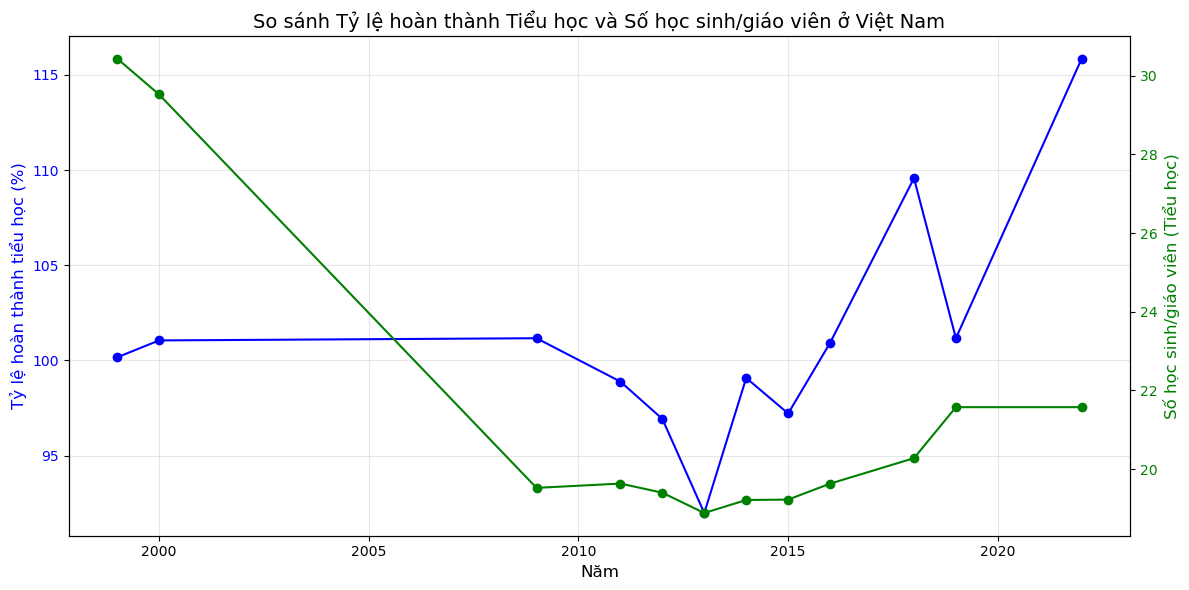

In [ ]:
vietnam_data = df[df['country'] == 'Viet Nam']

# Lấy các cột liên quan
years = vietnam_data['year']
pri_comp_rate = vietnam_data['pri_comp_rate_pct']
pupil_teacher_primary = vietnam_data['pupil_teacher_primary']

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))

# Trục Y cho tỷ lệ hoàn thành tiểu học
ax1.set_xlabel('Năm', fontsize=12)
ax1.set_ylabel('Tỷ lệ hoàn thành tiểu học (%)', color='blue', fontsize=12)
ax1.plot(years, pri_comp_rate, marker='o', color='blue', label='Tỷ lệ hoàn thành tiểu học (%)')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(alpha=0.3)

# Trục Y thứ hai cho số học sinh/giáo viên
ax2 = ax1.twinx()
ax2.set_ylabel('Số học sinh/giáo viên (Tiểu học)', color='green', fontsize=12)
ax2.plot(years, pupil_teacher_primary, marker='o', color='green', label='Số học sinh/giáo viên (Tiểu học)')
ax2.tick_params(axis='y', labelcolor='green')

# Tiêu đề và tuỳ chỉnh
plt.title('So sánh Tỷ lệ hoàn thành Tiểu học và Số học sinh/giáo viên ở Việt Nam', fontsize=14)
fig.tight_layout()

# Hiển thị biểu đồ
plt.show()

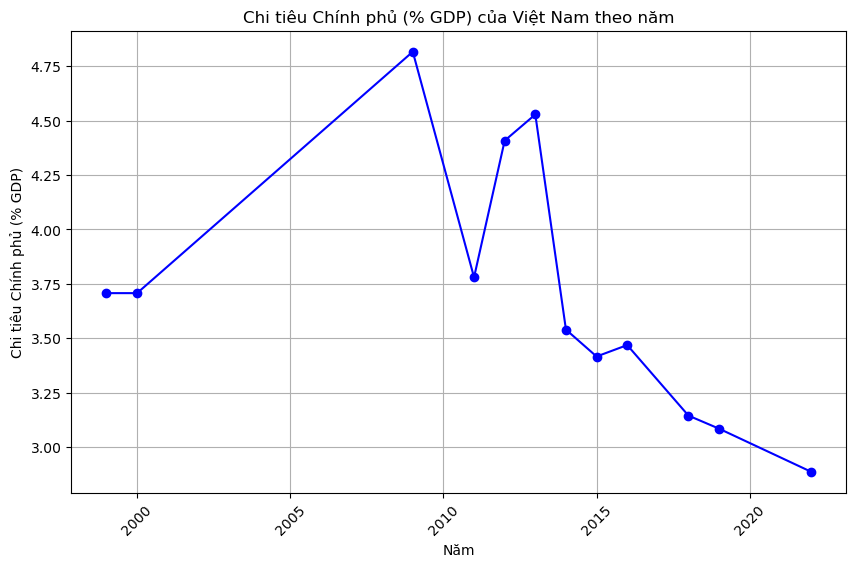

In [ ]:
df1 = df[df["country"] == "Viet Nam"]

# Vẽ biểu đồ đường cho chi tiêu chính phủ (% GDP)
plt.figure(figsize=(10, 6))
plt.plot(df1['year'], df1['gov_exp_pct_gdp'], marker='o', color='b')
plt.title('Chi tiêu Chính phủ (% GDP) của Việt Nam theo năm')
plt.xlabel('Năm')
plt.ylabel('Chi tiêu Chính phủ (% GDP)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

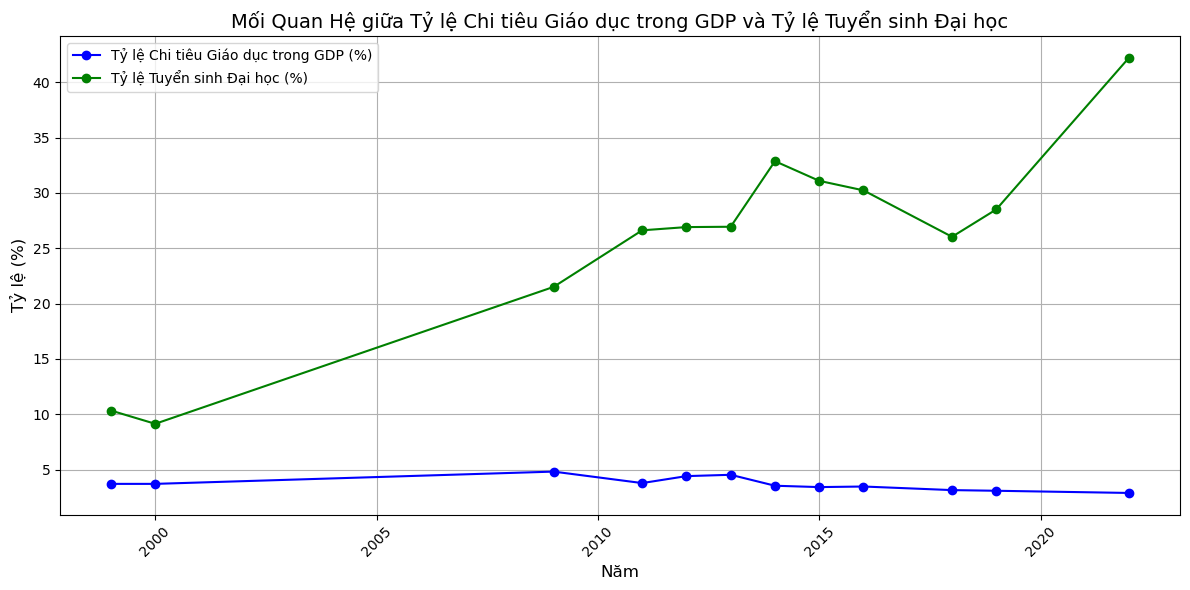

In [ ]:
country_data = df[df['country'] == 'Viet Nam']

# Vẽ biểu đồ đường cho tỷ lệ chi tiêu giáo dục trong GDP và tỷ lệ tuyển sinh đại học
plt.figure(figsize=(12, 6))

# Vẽ đường cho tỷ lệ chi tiêu giáo dục trong GDP
plt.plot(country_data['year'], country_data['gov_exp_pct_gdp'], marker='o', color='blue', label='Tỷ lệ Chi tiêu Giáo dục trong GDP (%)')

# Vẽ đường cho tỷ lệ tuyển sinh đại học
plt.plot(country_data['year'], country_data['school_enrol_tertiary_pct'], marker='o', color='green', label='Tỷ lệ Tuyển sinh Đại học (%)')

# Thêm tiêu đề và nhãn
plt.title('Mối Quan Hệ giữa Tỷ lệ Chi tiêu Giáo dục trong GDP và Tỷ lệ Tuyển sinh Đại học', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Tỷ lệ (%)', fontsize=12)

# Thêm chú thích (legend)
plt.legend()

# Hiển thị biểu đồ
plt.grid(True)
plt.xticks(rotation=45)  # Xoay nhãn năm để dễ đọc hơn
plt.tight_layout()  # Đảm bảo bố cục không bị chồng lấn
plt.show()

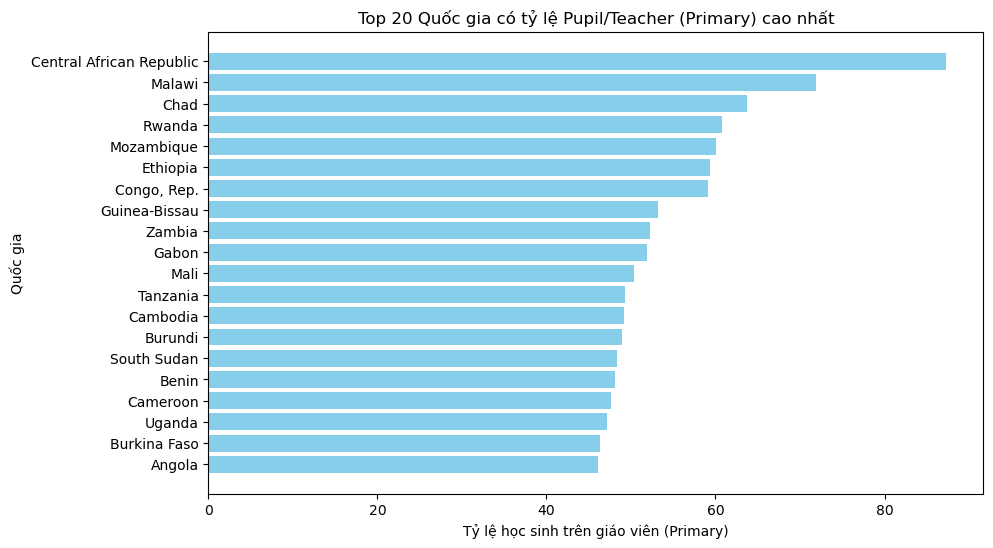

In [ ]:
# Đầu tiên, nhóm dữ liệu theo quốc gia và tính giá trị trung bình cho mỗi quốc gia
df_grouped = df.groupby('country')['pupil_teacher_primary'].mean().reset_index()

# Sắp xếp theo tỷ lệ Pupil_teacher_primary từ cao đến thấp và lấy top 20 quốc gia
df_top20 = df_grouped.sort_values('pupil_teacher_primary', ascending=False).head(20)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(df_top20['country'], df_top20['pupil_teacher_primary'], color='skyblue')
plt.xlabel('Tỷ lệ học sinh trên giáo viên (Primary)')
plt.ylabel('Quốc gia')
plt.title('Top 20 Quốc gia có tỷ lệ Pupil/Teacher (Primary) cao nhất')
plt.gca().invert_yaxis()  # Đảo ngược trục Y để quốc gia có tỷ lệ cao nhất nằm trên cùng
plt.show()

#### Biểu đồ này cho thấy top 20 quốc gia có tỷ lệ học sinh trên giáo viên (Pupil/Teacher) cấp tiểu học cao nhất. Các quốc gia với tỷ lệ cao thường có ít giáo viên hơn so với số học sinh, điều này có thể là dấu hiệu của tình trạng thiếu giáo viên hoặc lớp học quá đông.

#### Các quốc gia có tỷ lệ cao có thể đang gặp khó khăn trong việc cung cấp đủ số lượng giáo viên cho học sinh, điều này có thể ảnh hưởng đến chất lượng giáo dục.
Một số quốc gia trong danh sách có thể đang trong quá trình phát triển và cải cách giáo dục, với sự gia tăng học sinh nhưng chưa kịp tăng trưởng số lượng giáo viên.
Biểu đồ giúp xác định các quốc gia cần cải thiện tỉ lệ giáo viên/học sinh để nâng cao chất lượng giảng dạy và đảm bảo môi trường học tập hiệu quả hơn.